__5*.__ Даны две функции $y_{1}=f(x)$ и $y_{2}=g(x)$. Известно, что:

### $$f'(x)=\frac{1}{2}g(x)$$

### $$g'(x)=2-2f(x)$$

### $$f(0)=0$$

### $$g(0)=1$$

Восстановить функции $y_{1}=f(x)$ и $y_{2}=g(x)$ с помощью формулы:

### $$f(x+\Delta x) \approx f(x)+f'(x) \cdot \Delta x$$

на участке $[0, 20]$

В качестве решения построить график этих функций в одной системе координат.


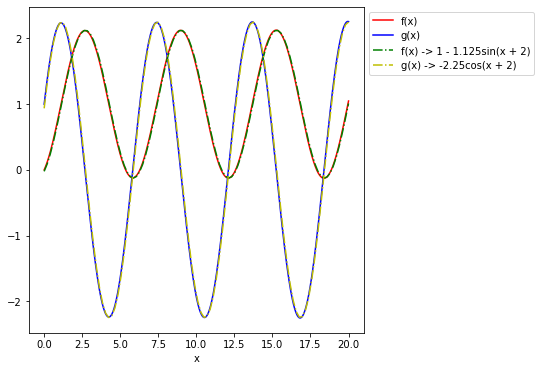

In [15]:
from scipy.optimize import fsolve, broyden2
import numpy as np
from matplotlib import pylab as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


def f_delta(delta, f_prev, g_prev):
    return f_prev + 0.5*g_prev*delta


def g_delta(delta, g_prev, f_prev):
    return g_prev + (2 - 2*f_prev)*delta


f = [0]
g = [1]
n = 20000
start = 0
end = 20
delta = (end - start) / n

for i in range(1, n):
    f.append(f_delta(delta, f[i - 1], g[i - 1]))
    g.append(g_delta(delta, g[i - 1], f[i - 1]))
            
plt.figure(figsize=(6,6))

x = np.linspace(start, end, n)
plt.plot(x, f, c='r', label="f(x)")
plt.plot(x, g, c='b', label="g(x)")
plt.xlabel("x")

# подобрал по графикам, производные также отвечают условиям
x = np.linspace(start, end, 100)
plt.plot(x, 1.0 - 1.125*np.sin(x+2), 'g-.', label="f(x) -> 1 - 1.125sin(x + 2)")
plt.plot(x, -2.25*np.cos(x+2), 'y-.', label="g(x) -> -2.25cos(x + 2)")

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()